# Análise de Correlação em Python
A Análise de Correlação é uma análise estatística descritiva, qual mede o grau de dependência entre variáveis. Em nosso caso vamos analisar o quanto os pares de moedas e criptomoedas interferem entre si, de forma apenas didática, no estudo do caso focaremos no coeficiente de Pearson.

Será uma análise bem simples, e usaremos as bibliotecas Python pandas e seaborn.

In [1]:
!pip install pandas seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## DataSet
Utilizaremos dados extraídos de uma corretora conhecida dos pares EURUSD, EURJPY, EURGBP e as criptomoedas BTC E ETH, em M5, coluna 'close'.

In [2]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
#Leitura dos dados
eurusd = pd.read_excel('Candles_M5_11_2022_EURUSD.xlsx', index_col='date')
eurjpy = pd.read_excel('Candles_M5_11_2022_EURJPY.xlsx', index_col='date')
eurgbp = pd.read_excel('Candles_M5_11_2022_EURGBP.xlsx', index_col='date')
btc = pd.read_excel('Candles_M5_11_2022_BTCUSD.xlsx', index_col='date')
eth = pd.read_excel('Candles_M5_11_2022_ETHUSD.xlsx', index_col='date')

## Merge de todas as dataframes

In [4]:
dfs = [eurusd, eurjpy, eurgbp, btc, eth]
df_final = reduce(lambda left, right: pd.merge(left, right, how='outer', on='date'), dfs)

In [5]:
df_final

,EURUSD,EURJPY,EURGBP,BTCUSD,ETHUSD
date,,,,,
2022-11-01 00:05,0.990305,146.785,0.860985,20549.9580,1593.0940
2022-11-01 00:10,0.990235,146.845,0.860815,20505.9510,1588.0930
2022-11-01 00:15,0.990095,146.845,0.860665,20507.5825,1588.2740
2022-11-01 00:20,0.989995,146.784,0.860645,20501.5085,1588.3225
2022-11-01 00:25,0.990045,146.779,0.860525,20487.7915,1586.6770
...,...,...,...,...,...
2022-11-30 23:35,1.042775,142.507,0.863010,17102.1650,1281.8215
2022-11-30 23:40,1.042475,142.569,0.863070,17112.9365,1283.4440
2022-11-30 23:45,1.042565,142.623,0.863150,17121.7605,1285.7245


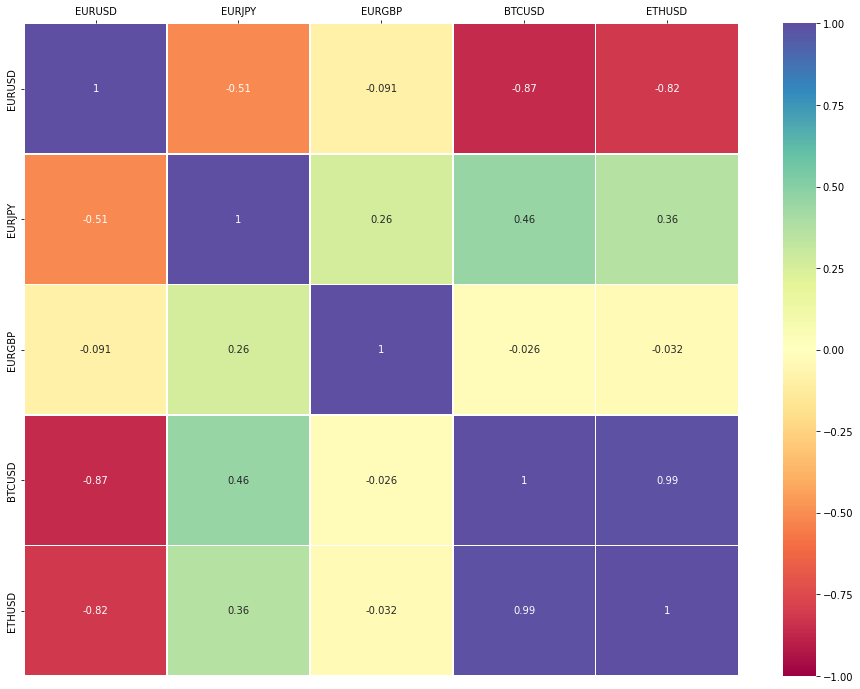

In [7]:
# Plotando os resultados em heatmap
_, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(df_final.corr(),annot=True, vmax= 1, vmin=-1,linewidths=.6, cmap='Spectral');
ax.xaxis.tick_top()

## Análise dos gráficos

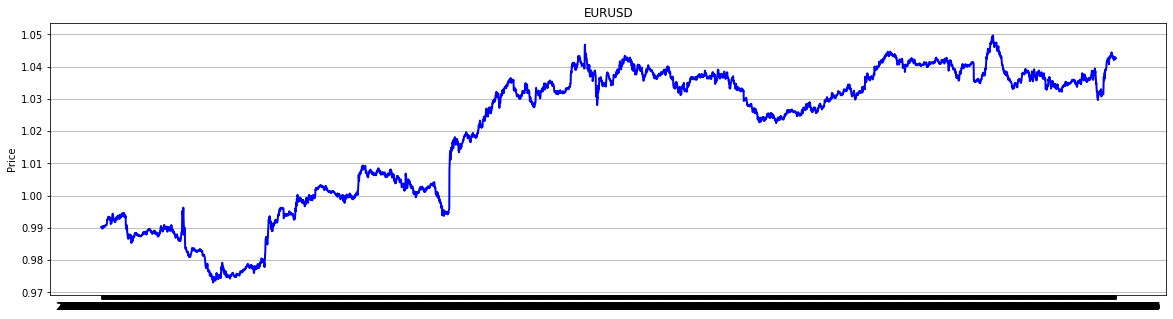

In [8]:
plt.figure(figsize=(20,5))
plt.plot(eurusd['EURUSD'],color='b',lw=2.)
plt.grid(axis='y')
plt.title('EURUSD')
plt.ylabel("Price")
plt.show();

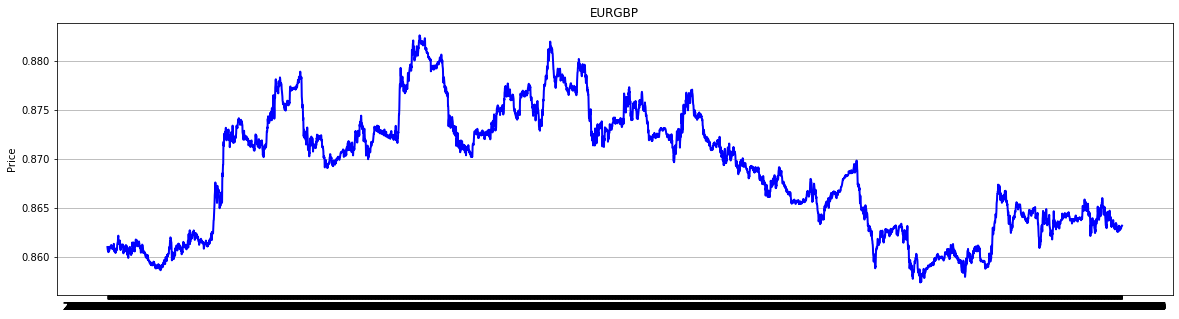

In [9]:
plt.figure(figsize=(20,5))
plt.plot(eurgbp['EURGBP'],color='b',lw=2.)
plt.ylabel("Price")
plt.title('EURGBP')
plt.grid(axis='y')
plt.show();

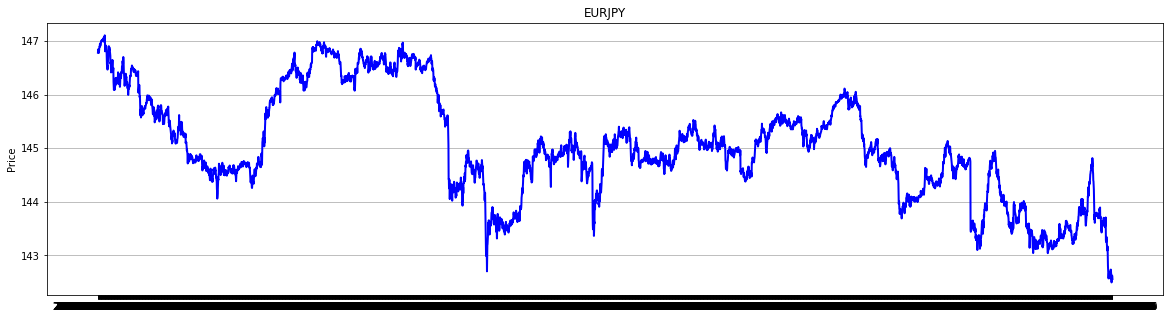

In [10]:
plt.figure(figsize=(20,5))
plt.plot(eurjpy['EURJPY'],color='b',lw=2.)
plt.ylabel("Price")
plt.title('EURJPY')
plt.grid(axis='y')
plt.show();

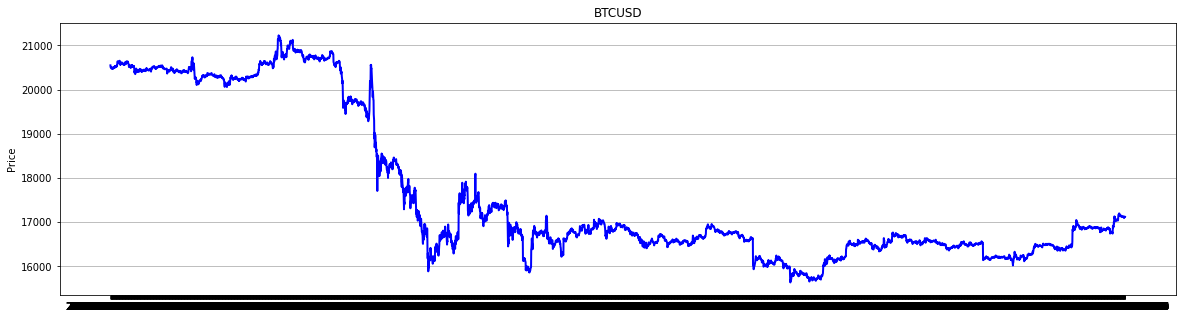

In [11]:
plt.figure(figsize=(20,5))
plt.plot(btc['BTCUSD'],color='b',lw=2.)
plt.ylabel("Price")
plt.title('BTCUSD')
plt.grid(axis='y')
plt.show();

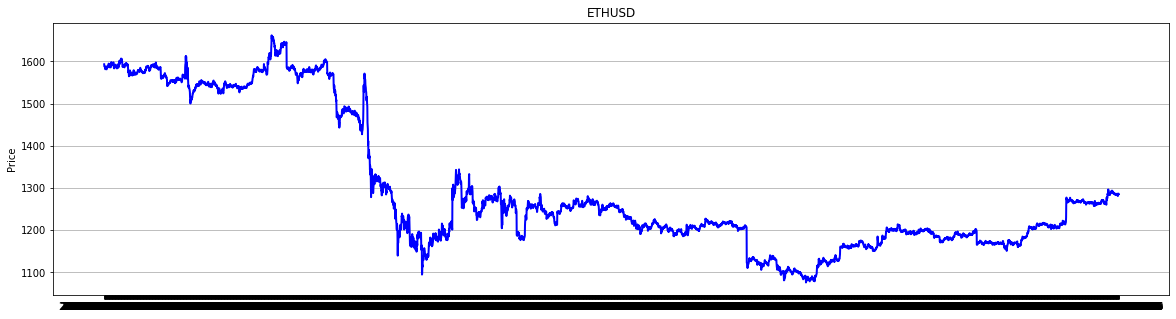

In [12]:
plt.figure(figsize=(20,5))
plt.plot(eth['ETHUSD'],color='b',lw=2.)
plt.ylabel("Price")
plt.title('ETHUSD')
plt.grid(axis='y')
plt.show();

## Conclusão
Pode-se observar pelo heatmap, a correlação entre os pares e as criptomoedas. As criptos são de extrema correlação, observa-se isso bem nos gráficos, já os pares nesse mês tiveram pouca correlação, também se observa nos gráficos.

Esse estudo foi meramente didático, mas podemos notar que o resultado no mapa de calor, foi bem visto nos gráficos.